Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None

Summary Statistics:
       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    15

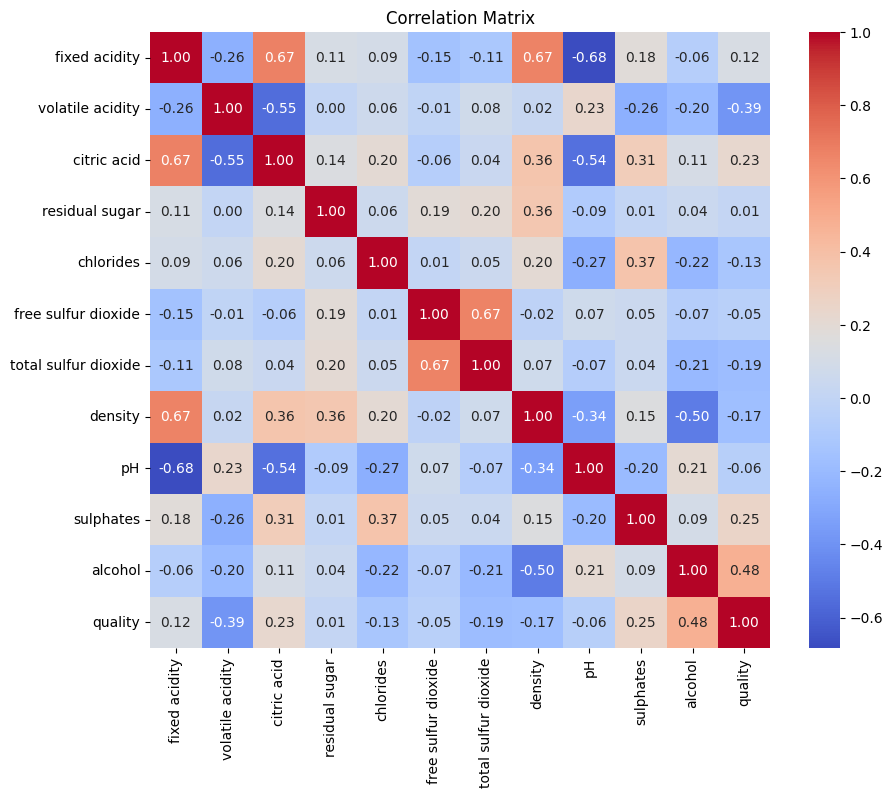

C:\Users\Ela\AppData\Local\Temp\ipykernel_11936\516665318.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='quality', data=wine_data, palette='viridis')


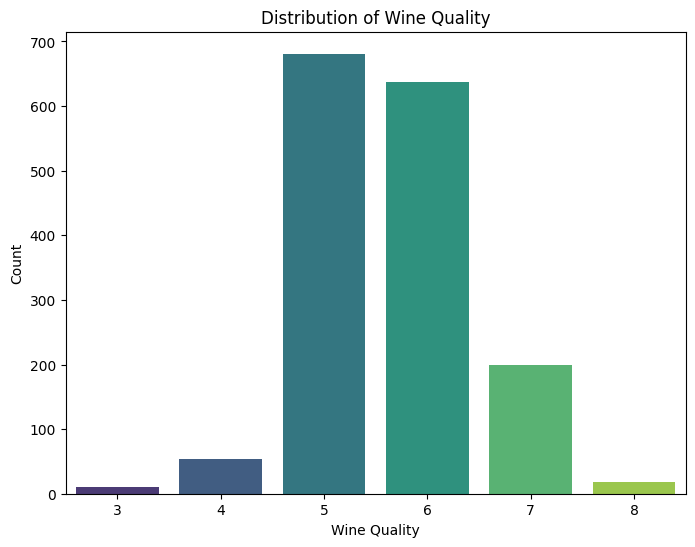

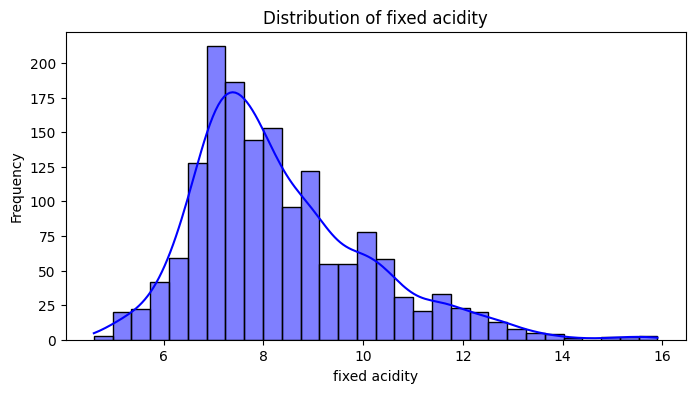

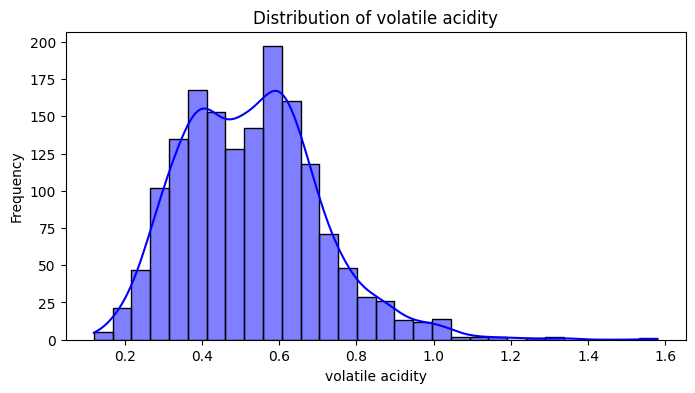

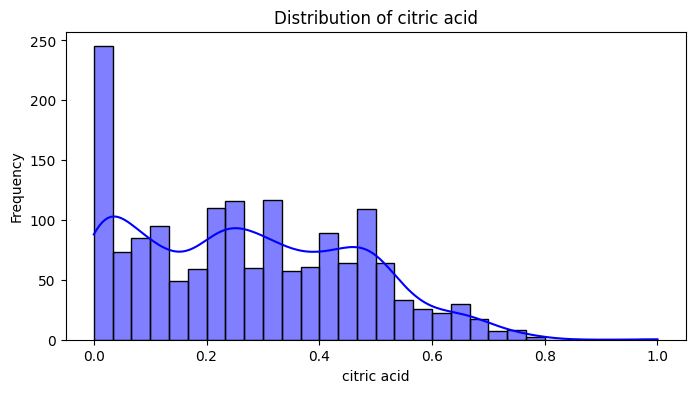

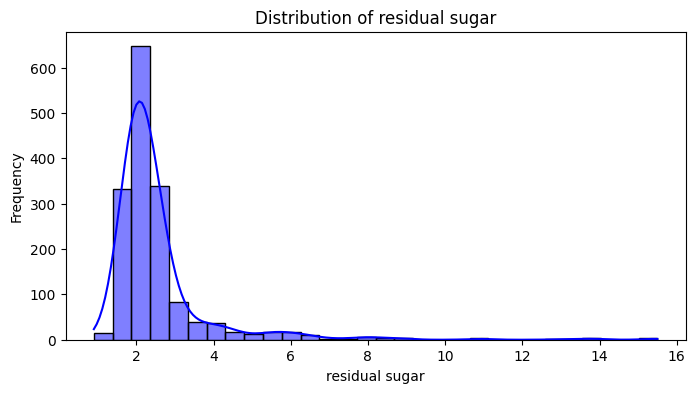

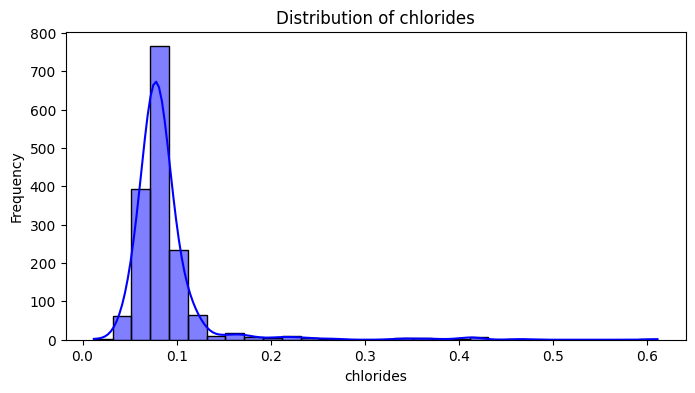

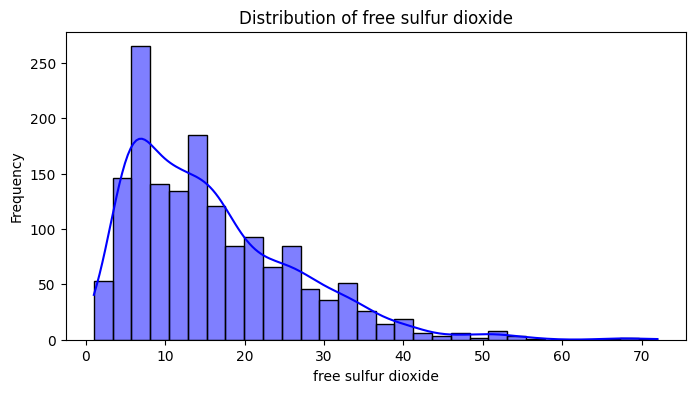

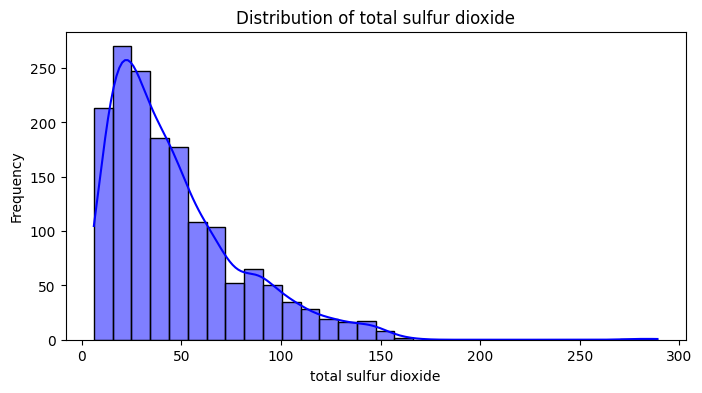

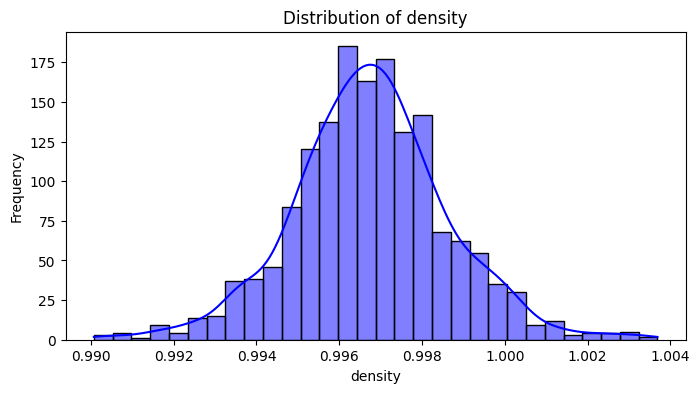

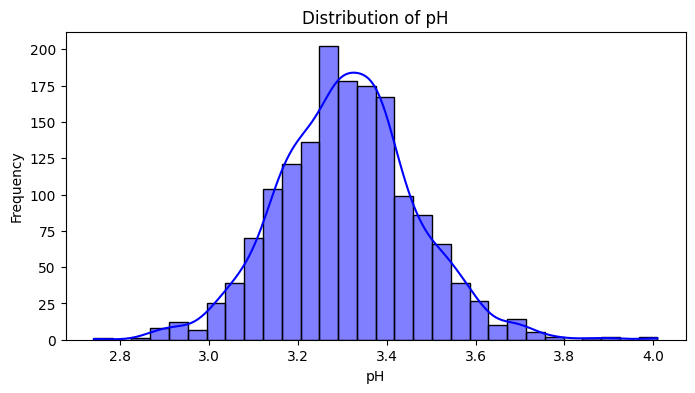

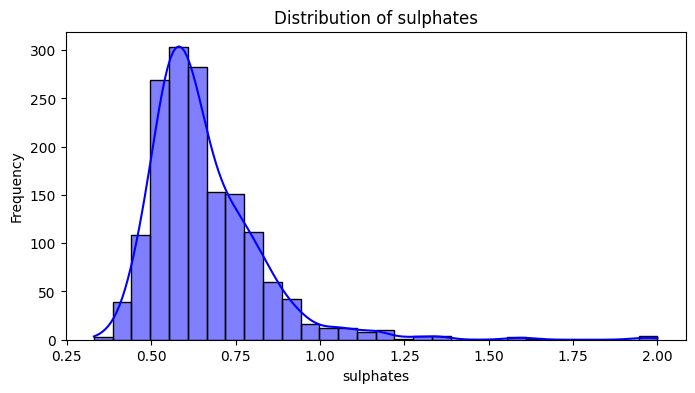

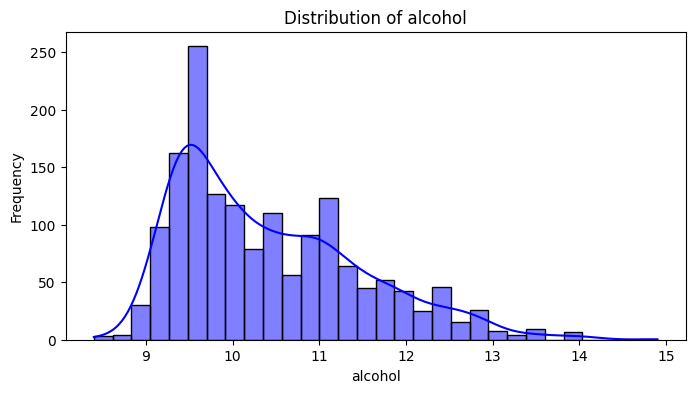

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the dataset
dataset_url = "https://raw.githubusercontent.com/763730440/Wine-Quality/main/winequality-red.csv"
wine_data = pd.read_csv(dataset_url, sep=',')

# Overview of the dataset
print("Dataset Overview:")
print(wine_data.info())
print("\nSummary Statistics:")
print(wine_data.describe())

# Checking for missing values
print("\nMissing Values:")
print(wine_data.isnull().sum())

# Visualizing correlations
plt.figure(figsize=(10, 8))
sns.heatmap(wine_data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()

# Distribution of the target variable
plt.figure(figsize=(8, 6))
sns.countplot(x='quality', data=wine_data, palette='viridis')
plt.title("Distribution of Wine Quality")
plt.xlabel("Wine Quality")
plt.ylabel("Count")
plt.show()

# Visualizing distributions of features
for column in wine_data.columns[:-1]:
    plt.figure(figsize=(8, 4))
    sns.histplot(wine_data[column], kde=True, bins=30, color='blue')
    plt.title(f"Distribution of {column}")
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.show()

# Splitting features and target
X = wine_data.drop(columns=['quality'])
y = wine_data['quality']

# Splitting dataset into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model 1: Logistic Regression with Hyperparameter Tuning
logistic_model = LogisticRegression(max_iter=1000)
param_grid_logistic = {'C': [0.01, 0.1, 1, 10], 'penalty': ['l1', 'l2'], 'solver': ['liblinear']}
grid_search_logistic = GridSearchCV(logistic_model, param_grid_logistic, cv=5, scoring='accuracy')
grid_search_logistic.fit(X_train_scaled, y_train)

best_logistic_model = grid_search_logistic.best_estimator_
y_pred_logistic = best_logistic_model.predict(X_test_scaled)

# Model 2: Random Forest Regressor with Hyperparameter Tuning
param_grid_rf = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20], 'min_samples_split': [2, 5, 10]}
grid_search_rf = GridSearchCV(RandomForestRegressor(random_state=42), param_grid_rf, cv=5, scoring='neg_mean_squared_error')
grid_search_rf.fit(X_train_scaled, y_train)

best_rf_model = grid_search_rf.best_estimator_
y_pred_rf = best_rf_model.predict(X_test_scaled)

Logistic Regression Accuracy: 0.565625


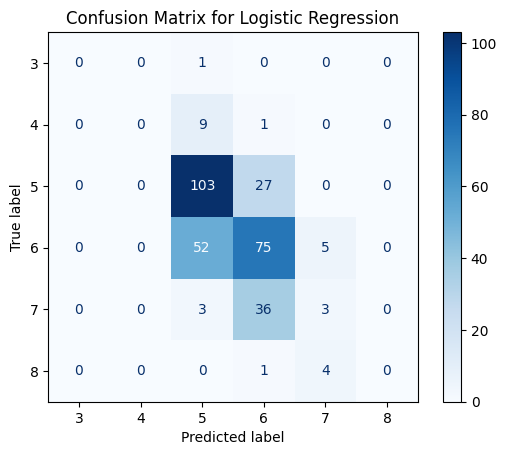

In [3]:
# Evaluating the models
# Logistic Regression Evaluation
logistic_accuracy = accuracy_score(y_test, y_pred_logistic)
print("Logistic Regression Accuracy:", logistic_accuracy)

# Confusion Matrix for Logistic Regression
conf_matrix = confusion_matrix(y_test, y_pred_logistic)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=np.unique(y))
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

Random Forest MSE: 0.30634921875
Random Forest R2: 0.5312219250138227


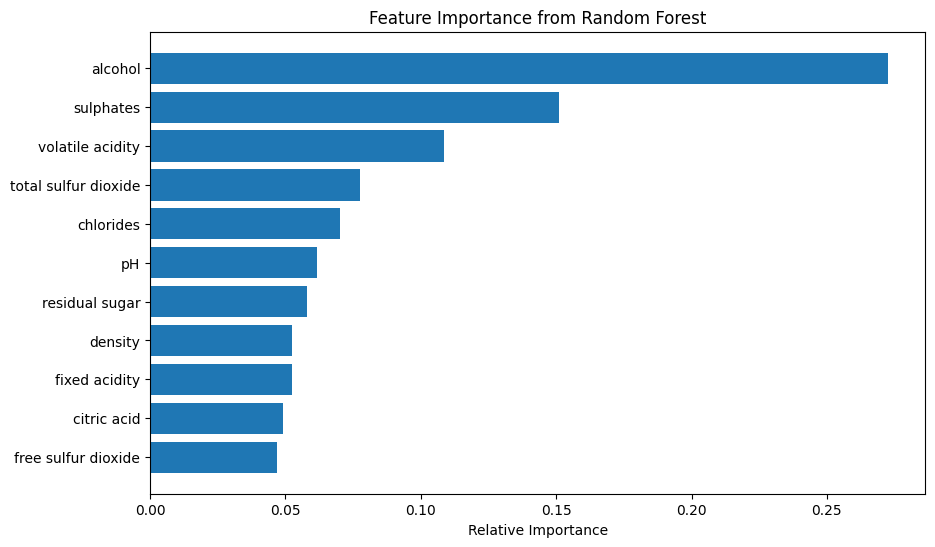

In [4]:
# Random Forest Evaluation
rf_mse = mean_squared_error(y_test, y_pred_rf)
rf_r2 = r2_score(y_test, y_pred_rf)
print("Random Forest MSE:", rf_mse)
print("Random Forest R2:", rf_r2)

# Visualizing feature importance from Random Forest
importances = best_rf_model.feature_importances_
features = X.columns
indices = np.argsort(importances)

plt.figure(figsize=(10, 6))
plt.title('Feature Importance from Random Forest')
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

Random Forest with MI Feature Transformation:
Mean Squared Error (MSE): 0.2988840625
R-squared (R2): 0.5426451680389726


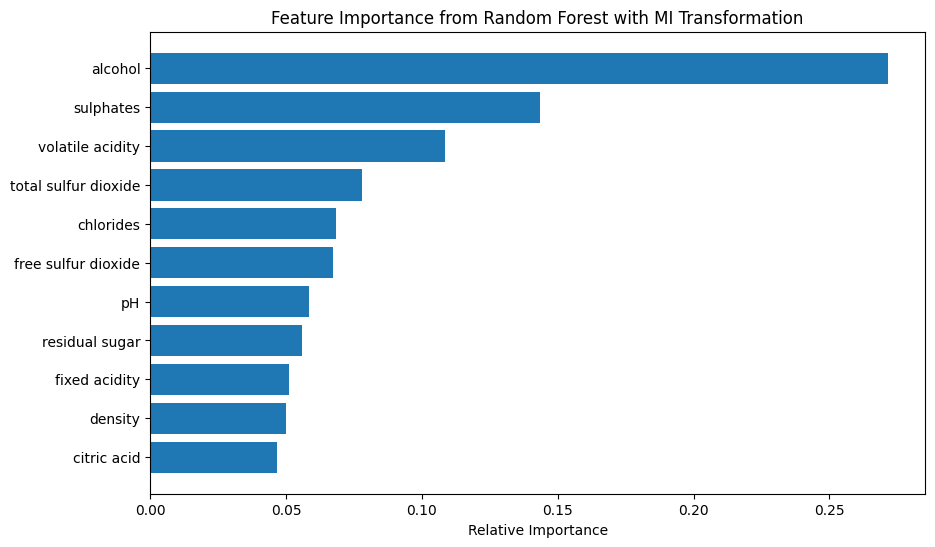

In [5]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

def joint_entropies(data, nbins=None):
    n_variables = data.shape[-1]
    n_samples = data.shape[0]
    if nbins is None:
        nbins = int((n_samples / 5) ** 0.5)
    histograms2d = np.zeros((n_variables, n_variables, nbins, nbins))
    for i in range(n_variables):
        for j in range(n_variables):
            histograms2d[i, j] = np.histogram2d(data[:, i], data[:, j], bins=nbins)[0]
    probs = histograms2d / len(data) + 1e-100
    joint_entropies = -(probs * np.log2(probs)).sum((2, 3))
    return joint_entropies

def mutual_info_matrix(df, nbins=None, normalized=True):
    data = df.to_numpy()
    n_variables = data.shape[-1]

    j_entropies = joint_entropies(data, nbins)
    entropies = j_entropies.diagonal()
    entropies_tile = np.tile(entropies, (n_variables, 1))
    sum_entropies = entropies_tile + entropies_tile.T
    mi_matrix = sum_entropies - j_entropies

    if normalized:
        mi_matrix = mi_matrix * 2 / sum_entropies
    return pd.DataFrame(mi_matrix, index=df.columns, columns=df.columns)

def compute_optimal_c(feature1, feature2, df):
    covariance = np.cov(df[feature1], df[feature2])[0, 1]
    variance = np.var(df[feature2])
    optimal_c = covariance / variance
    return optimal_c

dataset_url = "https://raw.githubusercontent.com/763730440/Wine-Quality/main/winequality-red.csv"
wine_data = pd.read_csv(dataset_url, sep=',')
X = wine_data.drop(columns=['quality'])
y = wine_data['quality']

scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

mi_matrix = mutual_info_matrix(X_scaled)

mi_threshold = 0.2
high_mi_pairs = mi_matrix.stack().reset_index()
high_mi_pairs.columns = ['Feature_1', 'Feature_2', 'MI']
high_mi_pairs = high_mi_pairs[high_mi_pairs['MI'] > mi_threshold]
high_mi_pairs = high_mi_pairs[high_mi_pairs['Feature_1'] != high_mi_pairs['Feature_2']]
high_mi_pairs = high_mi_pairs[high_mi_pairs['Feature_1'] < high_mi_pairs['Feature_2']]

coefficients = {}
for index, row in high_mi_pairs.iterrows():
    feature1, feature2 = row['Feature_1'], row['Feature_2']
    optimal_c = compute_optimal_c(feature1, feature2, X_scaled)
    coefficients[(feature1, feature2)] = optimal_c
    X_scaled[feature1] = X_scaled[feature1] - optimal_c * X_scaled[feature2]

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

rf_mse = mean_squared_error(y_test, y_pred_rf)
rf_r2 = r2_score(y_test, y_pred_rf)

print("Random Forest with MI Feature Transformation:")
print(f"Mean Squared Error (MSE): {rf_mse}")
print(f"R-squared (R2): {rf_r2}")

importances = rf_model.feature_importances_
features = X_scaled.columns
indices = np.argsort(importances)

plt.figure(figsize=(10, 6))
plt.title('Feature Importance from Random Forest with MI Transformation')
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()


Logistic Regression Accuracy with MI + WOE: 0.609375


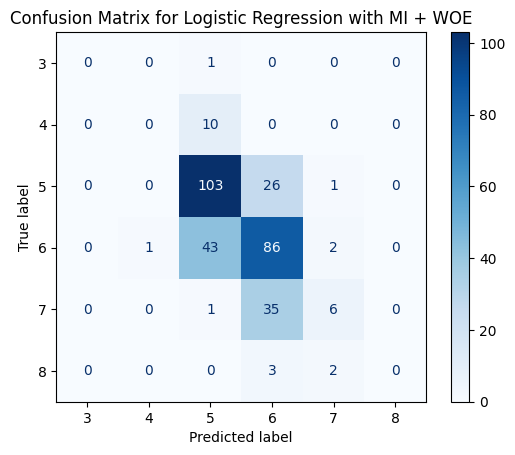

In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.preprocessing import KBinsDiscretizer
def joint_entropies(data, nbins=None):
    n_variables = data.shape[-1]
    n_samples = data.shape[0]
    if nbins is None:
        nbins = int((n_samples / 5) ** 0.5)
    histograms2d = np.zeros((n_variables, n_variables, nbins, nbins))
    for i in range(n_variables):
        for j in range(n_variables):
            histograms2d[i, j] = np.histogram2d(data[:, i], data[:, j], bins=nbins)[0]
    probs = histograms2d / len(data) + 1e-100
    joint_entropies = -(probs * np.log2(probs)).sum((2, 3))
    return joint_entropies

def mutual_info_matrix(df, nbins=None, normalized=True):
    data = df.to_numpy()
    n_variables = data.shape[-1]
    j_entropies = joint_entropies(data, nbins)
    entropies = j_entropies.diagonal()
    entropies_tile = np.tile(entropies, (n_variables, 1))
    sum_entropies = entropies_tile + entropies_tile.T
    mi_matrix = sum_entropies - j_entropies
    if normalized:
        mi_matrix = mi_matrix * 2 / sum_entropies
    return pd.DataFrame(mi_matrix, index=df.columns, columns=df.columns)

dataset_url = "https://raw.githubusercontent.com/763730440/Wine-Quality/main/winequality-red.csv"
wine_data = pd.read_csv(dataset_url, sep=',')
X = wine_data.drop(columns=['quality'])
y = wine_data['quality']
mi_matrix = mutual_info_matrix(X)

mi_threshold = 0.2
high_mi_pairs = mi_matrix.stack().reset_index()
high_mi_pairs.columns = ['Feature_1', 'Feature_2', 'MI']
high_mi_pairs = high_mi_pairs[high_mi_pairs['MI'] > mi_threshold]
high_mi_pairs = high_mi_pairs[high_mi_pairs['Feature_1'] != high_mi_pairs['Feature_2']]
high_mi_pairs = high_mi_pairs[high_mi_pairs['Feature_1'] < high_mi_pairs['Feature_2']]
for index, row in high_mi_pairs.iterrows():
    feature1, feature2 = row['Feature_1'], row['Feature_2']
    X[f'{feature1}_minus_{feature2}'] = X[feature1] - (X[feature1].mean() / X[feature2].mean()) * X[feature2]
def calculate_woe(df, feature, target):
    grouped = df.groupby(feature)[target].agg(['sum', 'count'])
    grouped['non_event'] = grouped['count'] - grouped['sum']
    grouped['event'] = grouped['sum']
    grouped['event_rate'] = grouped['event'] / grouped['event'].sum()
    grouped['non_event_rate'] = grouped['non_event'] / grouped['non_event'].sum()
    grouped['woe'] = np.log((grouped['event_rate'] + 1e-10) / (grouped['non_event_rate'] + 1e-10))
    return grouped['woe']

woe_transformed = pd.DataFrame()
for column in X.columns:
    discretizer = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='uniform')
    binned_feature = discretizer.fit_transform(X[[column]])
    binned_feature = binned_feature.flatten().astype(int)

    temp_df = pd.DataFrame({column: binned_feature, 'target': y})
    woe = calculate_woe(temp_df, column, 'target')
    binned_feature = np.clip(binned_feature, 0, len(woe) - 1)
    woe_transformed[f'{column}_woe'] = woe.iloc[binned_feature].values
X_train, X_test, y_train, y_test = train_test_split(woe_transformed, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

logistic_model = LogisticRegression(max_iter=1000)
param_grid_logistic = {'C': [0.01, 0.1, 1, 10], 'penalty': ['l1', 'l2'], 'solver': ['liblinear']}
grid_search_logistic = GridSearchCV(logistic_model, param_grid_logistic, cv=5, scoring='accuracy')
grid_search_logistic.fit(X_train_scaled, y_train)

best_logistic_model = grid_search_logistic.best_estimator_
y_pred_logistic = best_logistic_model.predict(X_test_scaled)

logistic_accuracy = accuracy_score(y_test, y_pred_logistic)
print("Logistic Regression Accuracy with MI + WOE:", logistic_accuracy)

conf_matrix = confusion_matrix(y_test, y_pred_logistic)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=np.unique(y))
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Logistic Regression with MI + WOE')
plt.show()
